<h1> Estimating CO2 emission of a new car using regression <h1>

## downloading the data set

In [1]:
!wget - O FuelConsumption.csv https: // s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.



<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## required packages

In [2]:
from sys import path 
path.append(r'C:\Users\thisi\machineLearning_f\Machine-learning-master\Supervised\utilities')

########################

from matplotlib import numpy as np, pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, accuracy_score
import seaborn as sns
import warnings

#local modules
from utilities import errors as e , models , preprocessing as prc

%matplotlib inline
#warnings.filterwarnings(action='ignore')

## loading data

In [3]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

## take a look at  the dataset.

In [5]:
print(f'''shape : {df.shape} \n\nkeys : {df.keys()}''')

shape : (1067, 13) 

keys : Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')


In [7]:
print(f'''manufactors:\n\n{df['MAKE'].unique()}''')

manufactors:

['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']


#### expand the model year to the range of 2014 to 2020

In [12]:
df['MODELYEAR'].iloc[np.random.randint(
    0, 1067, 700)] = np.random.choice([2015, 2016, 2017, 2018, 2019, 2020], 700)
df['MODELYEAR'].unique()

array([2020, 2014, 2019, 2016, 2015, 2018, 2017], dtype=int64)

### plotting 

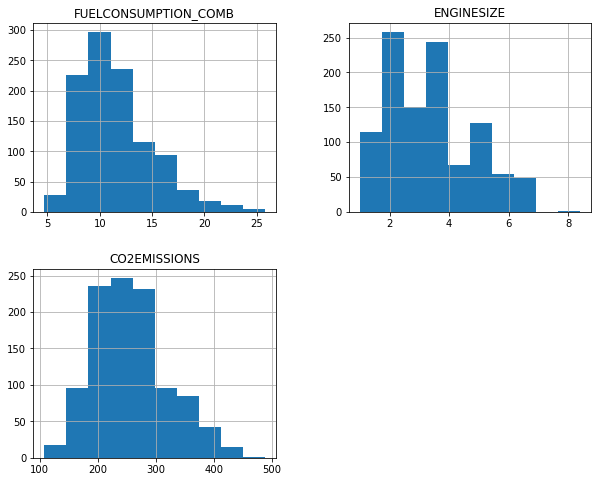

In [9]:
x = df[['FUELCONSUMPTION_COMB', 'ENGINESIZE','CO2EMISSIONS' ]]
x.hist(figsize=(10,8));
plt.show()

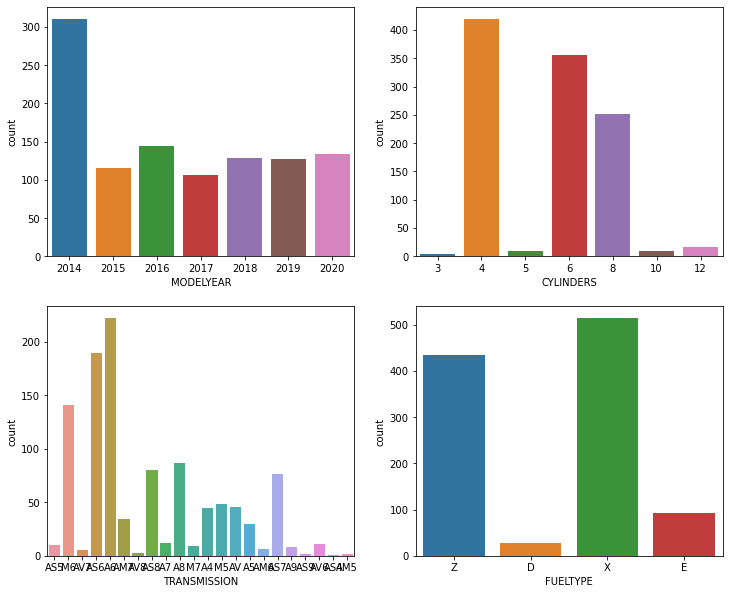

In [13]:
val_fig = plt.figure(num='value counts', figsize=(12.1, 10.1))
plt.subplot(2, 2, 1)
sns.countplot(df['MODELYEAR'])
plt.subplot(2, 2, 2)
sns.countplot(df['CYLINDERS'])
plt.subplot(2, 2, 3)
sns.countplot(df['TRANSMISSION'])
plt.subplot(2, 2, 4)
sns.countplot(df['FUELTYPE'])
plt.show()

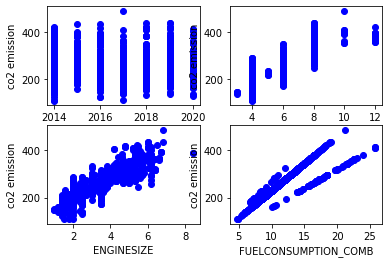

In [14]:
plt.subplot(2, 2, 1)
plt.scatter(df['MODELYEAR'], df['CO2EMISSIONS'], c='blue')
plt.xlabel('MODELYEAR')
plt.ylabel('co2 emission')
plt.subplot(2, 2, 2)
plt.scatter(df['CYLINDERS'], df['CO2EMISSIONS'], c='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('co2 emission')
plt.subplot(2, 2, 3)
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], c='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('co2 emission')
plt.subplot(2, 2, 4)
plt.scatter(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'], c='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('co2 emission')
plt.show()

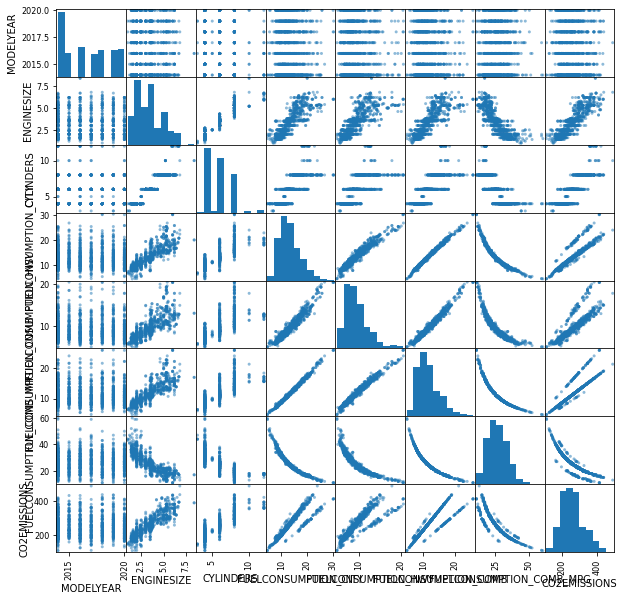

In [15]:
f_df = pd.DataFrame(df, columns=df.keys())
pd.plotting.scatter_matrix(f_df,  figsize=(10, 10))
plt.show()

## create a simple linear regression model

In [6]:
sample_data = np.asarray(df[['ENGINESIZE', 'CO2EMISSIONS']])
x = sample_data[:, 0]
y = sample_data[:, 1].reshape(-1,1)
w0 = np.ones((1,1))
model = models.LinearLogisticRegression(x=x,y=y,w=w0,tag='LinearRegression',standard=False,bias =1)
del x ; del y

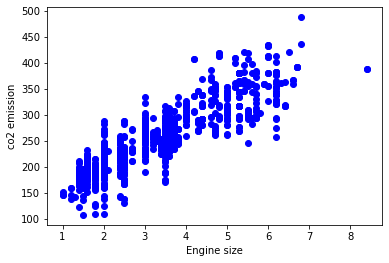

In [7]:
# plotting the new data
plt.scatter(sample_data[:, 0], sample_data[:, 1], c='blue')
plt.xlabel('Engine size')
plt.ylabel('co2 emission')
plt.show()

### split train and test (3 approaches)

In [8]:
# custom
train_x, test_x, train_y, test_y = prc.split_train_test(model.x,model.y)

# k-fold cross validation (unused)
k = KFold(5, shuffle=True)
k1, k2, k3, k4, k5 = k.split(model.x, model.y)

### learn / performance

#### using Scikit-learn

In [9]:
clf = LinearRegression()
clf.fit(train_x, train_y)
p = clf.predict(test_x)
print('coefficients : {} . bias : {} '.format(clf.coef_, clf.intercept_))

coefficients : [[38.79512384]] . bias : [127.16989951] 


In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,p)

746.4537521463632

In [12]:
model.loss(w= np.array([[38.79512384]]),bias = 127.16)

947.0968206401498

In [13]:
print(f'r2 score after learning :  {r2_score(test_y, p)}')

r2 score after learning :  0.7861345372905517


#### using gradient descent

End of the algorithm at the iteration number 50.
The differences in costs was less than 0.001


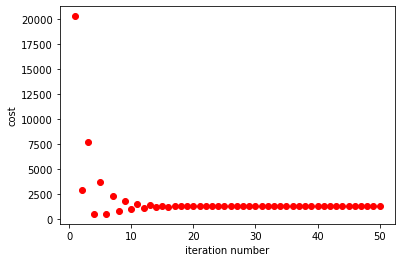

(array([[69.20209787]]), array([[69.20209787]]), 1292.217835895682)

In [15]:
model.gradient_descent(x=train_x,y=train_y,los= 'MSE',Type='mini-batch',verbose=0,inplace=True,lr=.5,converLim=.001,maxIter=500,plot_j=True)

In [24]:
print(f'''intercept: {model.bias}\ncoef: {model.w}\n\nfinal cost: {optim[-1]}''')

intercept: 1
coef: [[1.]]

final cost: 1347.3966981351005


In [19]:
Pred = model.Hyp(x = test_x, w0 = optim[0])
r2_score(test_y, Pred)

0.787675893577718

gradient descent worked well !

### plotting the hypothesis function

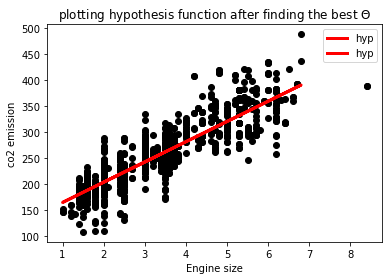

In [25]:
hyp = train_x * model.coef_ + model.intercept_
plt.title('plotting hypothesis function after finding the best $ \Theta $')
plt.plot(train_x, hyp, label='hyp', linewidth=3, color='red')
plt.scatter(sample_data[:, 0], sample_data[:, 1], c='black')
plt.xlabel('Engine size')
plt.ylabel('co2 emission')
plt.legend()
plt.show()

### estimating a new car co2 emission

In [21]:
eng = float(input('Enter an Egine size:'))
clf.intercept_ = clf.intercept_.reshape(1, 1)
predicted = eng * clf.coef_ + clf.intercept_
print('''estimated co2 emission for a car with engine size '{}' is: \n{} '''.format(
    eng, predicted[0, 0]))

Enter an Egine size:200
estimated co2 emission for a car with engine size '200.0' is: 
127.16989950881973 


### create a multiple linear regression

In [22]:
mlr_model = df[['ENGINESIZE', 'CYLINDERS',
                'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
X = prc.standardize_input(np.asarray(mlr_model[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]))
Y = np.asarray(mlr_model[['CO2EMISSIONS']])
W0 = np.array([[35],[5],[5],[5]])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [23]:
CLF = LinearRegression()
CLF.fit(X_train, Y_train)
p = CLF.predict(X_test)
print(f'coefficients : {CLF.coef_}   bias : {CLF.intercept_}' )

coefficients : [[ 0.         11.94392702  6.88346906  9.71196237]]   bias : [64.4803458]


In [24]:
print(f'r2 score after learning : {r2_score(Y_test, p)}')

r2 score after learning : 0.8335018551377377


gradient descent :

/home/mahdi/machineLearning_f/Machine-learning-master/Supervised/utilities/models.py:218: LearningRateWarning: ' bad learning rate '
  warnings.warn(e.LearningRateWarning(


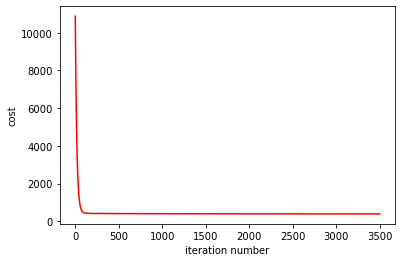

(array([[58.8488465 ],
        [ 9.94869491],
        [ 8.32916658],
        [10.028489  ]]),
 396.4121335274364)

In [25]:
model.gradient_descent(x=X_train,y=Y_train,w0=W0,los= 'VEC',Type='batch',inplace=False,lr=.013390,converLim=.001,maxIter=3500,plot_j=True)

gradient descent is not working well. maybe a bad learning rate or something else. Using normal equation instead :

In [26]:
OPTIM = model.normal_equation(x=X_train,y=Y_train,w0=W0)

In [27]:
print(f'final weight after using normal equation :\n {OPTIM}')

final weight after using normal equation :
 [[64.4803458 ]
 [11.94392702]
 [ 6.88346906]
 [ 9.71196237]]


In [28]:
print(f'cost : {model.loss(x=X,y=Y,w0=OPTIM)}')

cost : 546.8870713969319


Normal equation is working better than gradient descent for this problem.

In [29]:
eng, cyl, fue = float(input('Step 1 of 3 :\nEnter an Egine size:')), float(input(
    'Step 2 of 3: \nEnter number of cylinders:')), float(input('Step3 of 3: \nEnter FUELCONSUMPTION_COMB:'))
CLF.intercept_ = CLF.intercept_.reshape(1, 1)
predicted = (np.array([[eng, cyl, fue]]) * CLF.coef_[:,1:]) + CLF.intercept_
print('''estimated co2 emission for the car is: \n{} '''.format(
    predicted[0, 0]))

Step 1 of 3 :
Enter an Egine size:200
Step 2 of 3: 
Enter number of cylinders:5
Step3 of 3: 
Enter FUELCONSUMPTION_COMB:210
estimated co2 emission for the car is: 
2453.265750480744 


thanks!